# HERA  Radio Telescope Data Analysis

The data used in this lab is the third set of the data collected by the Hydrogen Epoch of Reionization Array (HERA), a radio interferometer located in South Africa.


Get familiar with your data, making sure you understand the axes, etc.
Following the links in the data instructions, read about your instrument and how the data was taken
Explore your data. Make a series of plots and histograms to explore your data. Be thorough, and let your interest guide you.

In [191]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import xarray as xr

plt.rcParams["figure.figsize"] = (20,15)

First, get an understanding of the shape of our data:

In [192]:
hf = h5py.File("zen.2458108.57290.HH.uvh5", "r")
hf.keys()

<KeysViewHDF5 ['Data', 'Header']>

In [193]:
for item in np.array(hf.get("Header")):
    shape = np.array(hf.get("Header")[item]).shape
    print(f"{shape} {item}")

() Nants_data
() Nants_telescope
() Nbls
() Nblts
() Nfreqs
() Npols
() Nspws
() Ntimes
() altitude
(82680,) ant_1_array
(82680,) ant_2_array
(52,) antenna_diameters
(52,) antenna_names
(52,) antenna_numbers
(52, 3) antenna_positions
() channel_width
(7,) extra_keywords
(1, 1024) freq_array
() history
() instrument
(82680,) integration_time
() latitude
() longitude
(82680,) lst_array
() object_name
() phase_type
(4,) polarization_array
(1,) spw_array
() telescope_name
(82680,) time_array
(82680, 3) uvw_array
() vis_units


In [83]:
for item in np.array(hf.get("Data")):
    shape = np.array(hf.get("Data")[item]).shape
    print(f"Shape of {item}: {shape}")

Shape of flags: (82680, 1, 1024, 4)
Shape of nsamples: (82680, 1, 1024, 4)
Shape of visdata: (82680, 1, 1024, 4)


From the HERA data assignment, this data array has shape:  
(# baselines*times, # spectral windows, # frequencies (Hz), # polarizations)  
(82680, 1, 1024, 4)

Since the sky ought to be fairly constant in time, and the computational ability of my computer is fairly low, using a collection of the first 5000 data points instead of the entirity of the file.

In [194]:
# Coordinates
header = hf.get("Header")
time_coords = np.array(header["time_array"])[:5000]
polar_coords = np.array(header["polarization_array"])
freq_coords = np.array(header["freq_array"]).squeeze()

# Data
data = hf.get("Data")
visdata_arr = np.array(data["visdata"]).squeeze()[:5000]

In [195]:
visdata = xr.DataArray(visdata_arr,
                       coords=[time_arr, freq_arr, polar_arr], 
                       dims=["time", "freq", "polarization"])

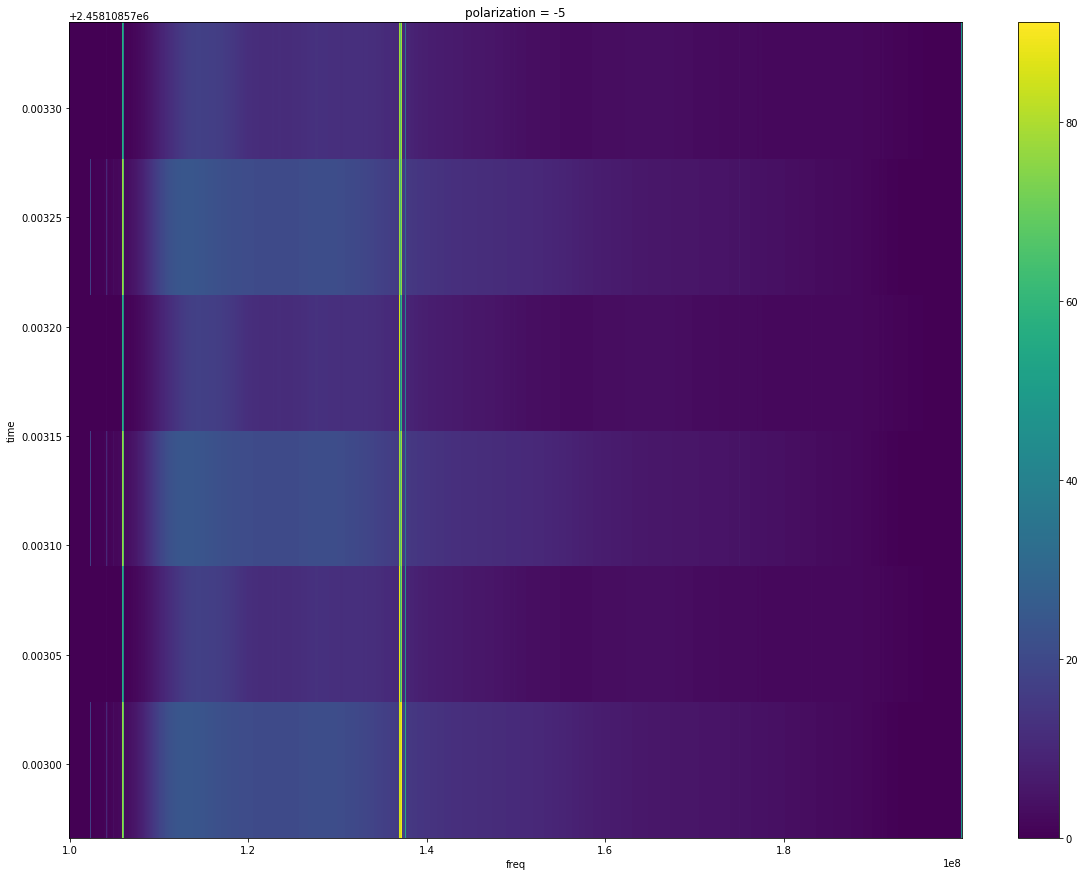

In [215]:
abs(visdata.isel(polarization=0)).plot()

In [218]:
print(np.array(hf.get('Header').get('polarization_array')))

[-5 -6 -7 -8]


In this instance, values of -5, -6, -7, and -8 correspond to XX, YY, XY, and YX polarizations respectively.

The above plot represents the evolution over time of the visdata produced by all the antennas in the HERA radio telescope array.

([array([0.07916754, 0.02978156, 0.        , 0.        , 0.00010713,
         0.00021426, 0.00010713, 0.        , 0.00010713, 0.00021426]),
  array([1.08949099e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.07127924e-04, 4.28511695e-04, 0.00000000e+00, 1.07127924e-04,
         1.07127924e-04, 0.00000000e+00]),
  array([1.09163354e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.07127924e-04, 2.14255848e-04, 1.07127924e-04, 1.07127924e-04,
         0.00000000e+00, 0.00000000e+00]),
  array([1.08949099e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.14255848e-04, 4.28511695e-04, 0.00000000e+00, 1.07127924e-04,
         0.00000000e+00, 0.00000000e+00]),
  array([1.08949099e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.07127924e-04, 2.14255848e-04, 1.07127924e-04, 2.14255848e-04,
         1.07127924e-04, 0.00000000e+00]),
  array([1.08949099e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.07127924e-04, 4.2851

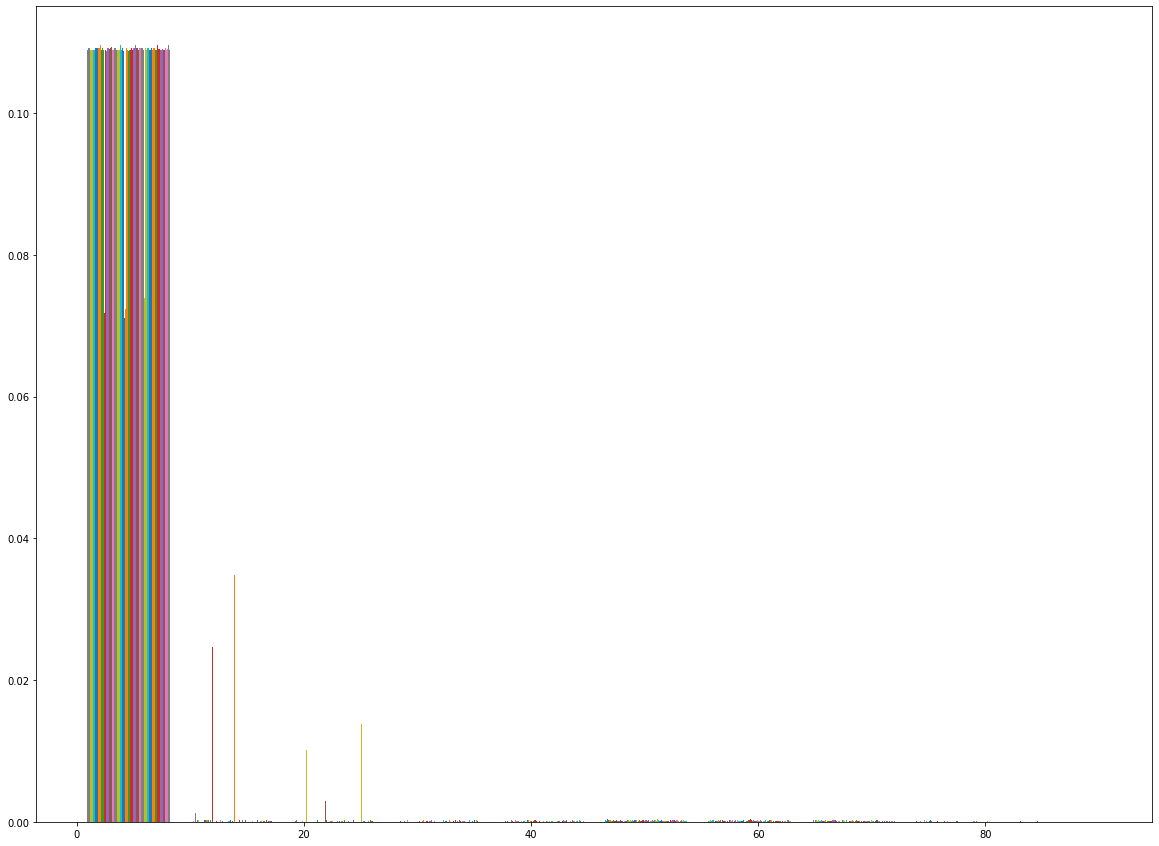

In [220]:
plt.hist(abs(visdata.isel(polarization=0)), density=True)